In [7]:
import os
import random 
from glob import glob 
import numpy as np 
import matplotlib.pyplot as plt 
from tqdm.notebook import tqdm 
import json
import pandas as pd
from scipy.stats import norm

from poreUtils import *


In [2]:
# def NormalizeData(data):
#     return (data - np.min(data)) / (np.max(data) - np.min(data))

In [ ]:
# Normalization function for global min max 
# def globNorm(data, gmin, gmax):
#     return (data - gmin) / (gmax - gmin)

In [ ]:
# # Getting all the blob volumes to find the global minimum and maximum for scaling
# for s in scans:
#     result_path = os.path.join(root_dir, s, 'result')
#     json_path = glob(result_path + '\*.json')
#     blobs = []
#     for f in json_path:
#         file = open(f)
#         data = json.load(file)
#         blobs += data['blob_analysis']['result']['VOLUME']
#         file.close()

# global_min = min(blobs)
# global_max = max(blobs)

# print(global_min, global_max)

In [8]:
# Directory where the scans are stored with results 
root_dir = 'D:\sagar\Data'

In [9]:
# Getting the scans where pypore3d analysis has been run 
scans = []
for p in os.listdir(root_dir):
    file_path = os.path.join(root_dir, p, 'porespy')
    if os.path.exists(file_path):
        scans.append(p)

In [10]:
# geting the group information
df = pd.read_csv('study_group.csv')
df

,Identification,Group,ImgBL,ImgVILI,Sample,Scan
0,Rat1,Con-VILI,1,1,MD_1264_A1,MD_1264_A1_1_Z0.0mm
1,Rat1,Con-VILI,1,1,MD_1264_A1,MD_1264_A1_1_Z3.3mm
2,Rat1,Con-VILI,1,1,MD_1264_A1,MD_1264_A1_1_Z6.6mm
3,Rat1,Con-VILI,1,1,MD_1264_A1,MD_1264_A1_1_Z9.9mm
4,Rat1,Con-VILI,1,1,MD_1264_A1,MD_1264_A1_1_Z13.2mm
...,...,...,...,...,...,...
72,Rat9,Ble-VILI,1,1,MD_1264_B9,MD_1264_B9_Z0.0mm
73,Rat9,Ble-VILI,1,1,MD_1264_B9,MD_1264_B9_Z3.3mm
74,Rat9,Ble-VILI,1,1,MD_1264_B9,MD_1264_B9_Z6.6mm
75,Rat10,Con-VILI,1,1,MD_1264_B10,MD_1264_B10_Z0.0mm


In [11]:
# creating diffrent groupsfrom the available scans
scan_groups = {}
for g in np.unique(df['Group']):
    scan_groups[g] = []

for scan in scans:
    scan_index = df.loc[df['Scan'] == str(scan)].index[0]
    group = df['Group'][scan_index]
    scan_groups[group].append(scan)

print(scan_groups)

{'Ble': ['MD_1264_A11_Z3.3mm_corr_phrt', 'MD_1264_A18', 'MD_1264_A3_1_Z0.0mm', 'MD_1264_A3_1_Z3.3mm', 'MD_1264_A3_1_Z6.6mm', 'MD_1264_A3_1_Z9.9mm', 'MD_1264_A6_1_Z3.3mm_corr_phrt', 'MD_1264_B3_1_Z3.3mm'], 'Ble-VILI': ['MD_1264_A12_Z3.3mm_corr_phrt', 'MD_1264_A2_1_Z3.3mm', 'MD_1264_A5_1_Z0.0mm_corr_phrt', 'MD_1264_A8_1_Z3.3mm_corr_phrt', 'MD_1264_A9_Z0.0mm_Z3.3mm', 'MD_1264_B2_1', 'MD_1264_B5_1_Z3.3mm', 'MD_1264_B9_Z3.3mm'], 'Con-VILI': ['MD_1264_A10_Z6.6mm', 'MD_1264_A13_1_Z3.3mm_corr_phrt', 'MD_1264_A16_Z3.3mm_corr_phrt', 'MD_1264_A1_1_Z3.3mm', 'MD_1264_A4_1_Z0.0mm_Z0.0mm_corr_phrt', 'MD_1264_A4_1_Z0.0mm_Z3.3mm_corr_phrt', 'MD_1264_A4_1_Z0.0mm_Z6.6mm_corr_phrt', 'MD_1264_B10_Z3.3mm', 'MD_1264_B4_1_Z3.3mm']}


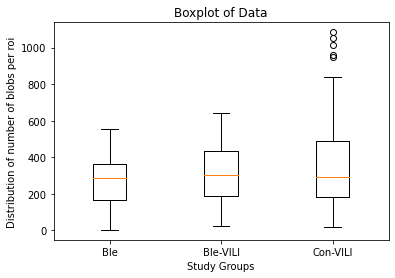

In [19]:
# creating list of lists. where each list is a group
no_of_blob_per_group = []
for key in scan_groups.keys():
    json_files = []
    for aFile in scan_groups[key]:
        fpath = os.path.join(root_dir, aFile, 'porespy')
        json_files += glob(fpath+'\*dth8.json')
        
    no_of_blob = [] 
    for i, j in enumerate(json_files):
        file = open(j)
        data = json.load(file)
        file.close()
        no_of_blob.append(len(data['label']))

    no_of_blob_per_group.append([key, no_of_blob])

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the boxplot
ax.boxplot([x[1] for x in no_of_blob_per_group])

# Add labels and a title to the plot
ax.set_xlabel('Study Groups')
ax.set_ylabel('Distribution of number of blobs per roi')
ax.set_title('Boxplot of Data')
ax.set_xticklabels([x[0] for x in no_of_blob_per_group])

# Display the plot
plt.show()

In [9]:
seed_threshold = ['dth8', 'dth10', 'dth12']
no_of_blob_per_group_per_seed = []
for seed in seed_threshold:
    # number of blobs per group
    no_of_blob_per_group = []
    for key in scan_groups.keys():
        json_files = []
        for aFile in scan_groups[key]:
            fpath = os.path.join(root_dir, aFile, 'porespy')
            json_files += glob(fpath + '\*' + seed + '.json')
        
        no_of_blob = [] 
        for i, j in enumerate(json_files):
            file = open(j)
            data = json.load(file)
            file.close()
            no_of_blob.append(len(data['label']))
        no_of_blob_per_group.append([key, no_of_blob])    
    
    no_of_blob_per_group_per_seed.append([seed, no_of_blob_per_group])


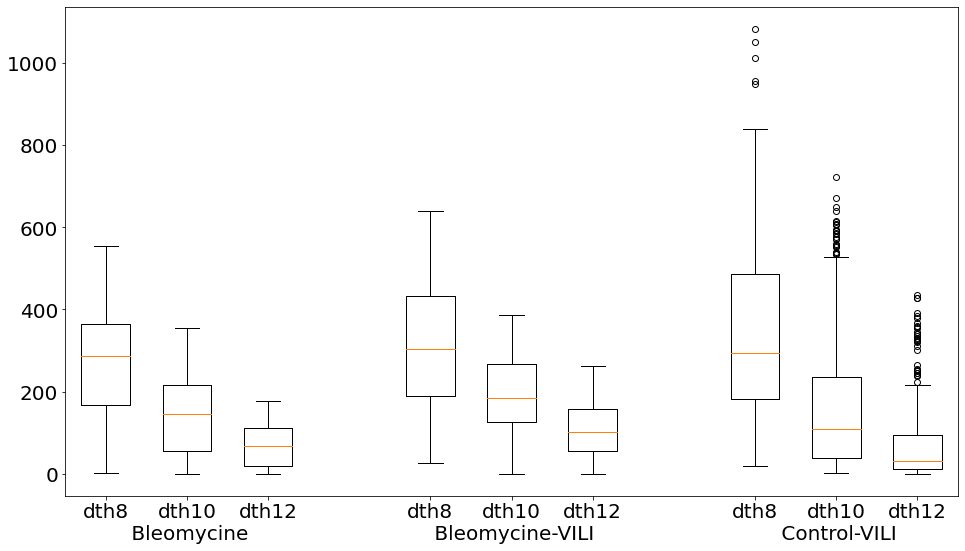

In [10]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(16,9))    
xticks = []
xticklabels = []   
for i, aSeedData in enumerate(no_of_blob_per_group_per_seed):

    for j, gr_of_seed in enumerate(aSeedData[1]):
        grp = gr_of_seed[0]
        data = gr_of_seed[1]
        ax.boxplot(data, positions=[i+j*4], widths=0.6)
        
        xticks.append(i+j*4)
        if j == 0 and aSeedData[0] == 'dth10':
            xticklabels.append(aSeedData[0]+'\n Bleomycine')
        elif j == 1 and aSeedData[0] == 'dth10':
            xticklabels.append(aSeedData[0]+'\n Bleomycine-VILI')

        elif j == 2 and aSeedData[0] == 'dth10':
            xticklabels.append(aSeedData[0]+'\n Control-VILI')
        
        else:
            xticklabels.append(aSeedData[0])



        
ax.set_xticklabels(xticklabels)
ax.set_xticks(xticks)
ax.tick_params(axis='both', which='major', labelsize=20)


plt.show()

    

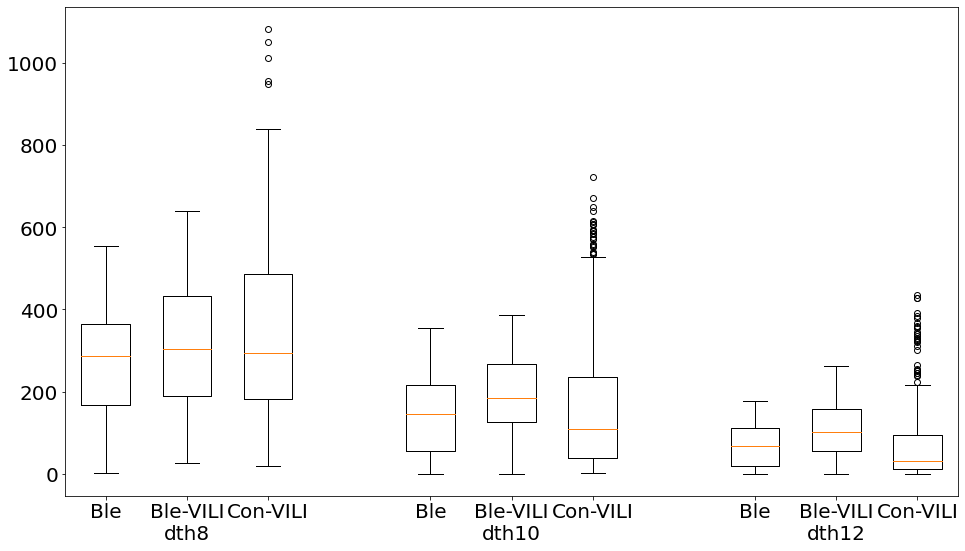

In [11]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(16,9))    
xticks = []
xticklabels = []   
for i, aSeedData in enumerate(no_of_blob_per_group_per_seed):

    for j, gr_of_seed in enumerate(aSeedData[1]):
        grp = gr_of_seed[0]
        data = gr_of_seed[1]
        ax.boxplot(data, positions=[i*4+j], widths=0.6)
        
        xticks.append(i*4+j)
        if grp == 'Ble-VILI':
            xticklabels.append(grp+'\n'+aSeedData[0])
        
        else:
            xticklabels.append(grp)


ax.set_xticklabels(xticklabels)
ax.set_xticks(xticks)
ax.tick_params(axis='both', which='major', labelsize=20)

plt.show()

## Volume Distribution

In [12]:
# Volume Distribution

seed_threshold = ['dth8', 'dth10', 'dth12']
blob_volume_per_group_per_seed = []
for seed in seed_threshold:
    # number of blobs per group
    blob_volume_per_group = []
    for key in scan_groups.keys():
        json_files = []
        for aFile in scan_groups[key]:
            fpath = os.path.join(root_dir, aFile, 'porespy')
            json_files += glob(fpath + '\*' + seed + '.json')
        
        blob_volume = [] 
        for i, j in enumerate(json_files):
            file = open(j)
            data = json.load(file)
            file.close()
            blob_volume += data['volume']
        blob_volume_per_group.append([key, blob_volume])    
    
    blob_volume_per_group_per_seed.append([seed, blob_volume_per_group])

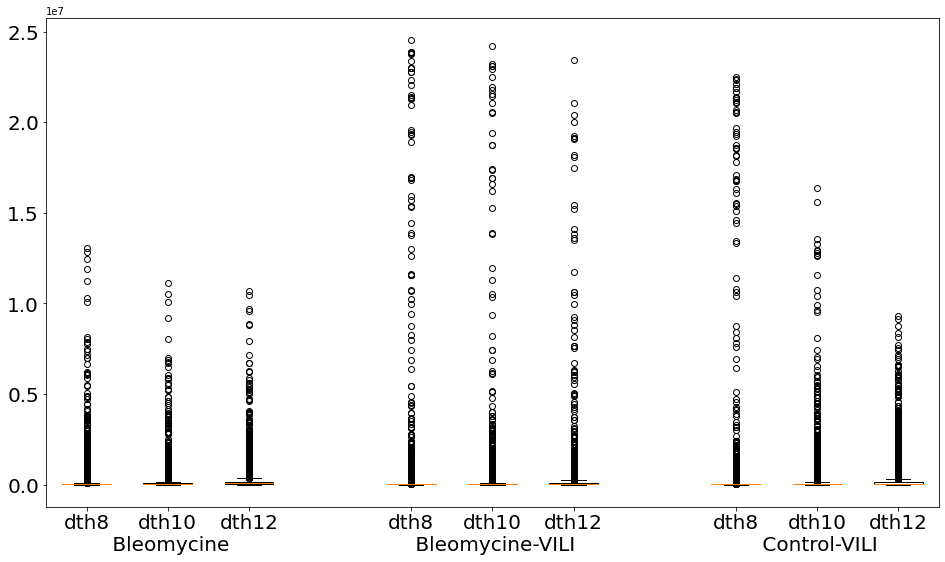

In [13]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(16,9))    
xticks = []
xticklabels = []   
for i, aSeedData in enumerate(blob_volume_per_group_per_seed):

    for j, gr_of_seed in enumerate(aSeedData[1]):
        grp = gr_of_seed[0]
        data = gr_of_seed[1]
        ax.boxplot(data, positions=[i+j*4], widths=0.6)
        
        xticks.append(i+j*4)
        if j == 0 and aSeedData[0] == 'dth10':
            xticklabels.append(aSeedData[0]+'\n Bleomycine')
        elif j == 1 and aSeedData[0] == 'dth10':
            xticklabels.append(aSeedData[0]+'\n Bleomycine-VILI')

        elif j == 2 and aSeedData[0] == 'dth10':
            xticklabels.append(aSeedData[0]+'\n Control-VILI')
        
        else:
            xticklabels.append(aSeedData[0])



ax.set_xticklabels(xticklabels)
ax.set_xticks(xticks)
ax.tick_params(axis='both', which='major', labelsize=20)

plt.show()


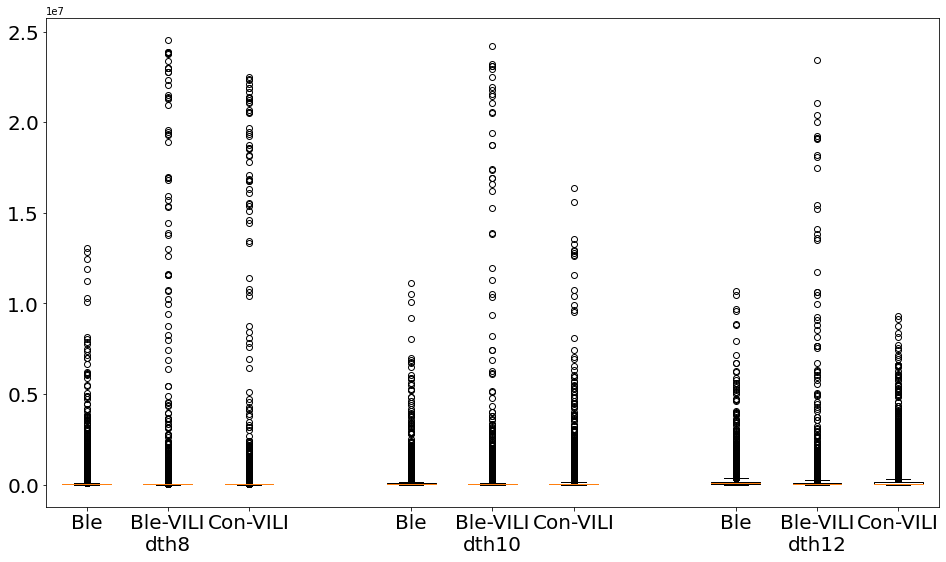

In [15]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(16,9))    
xticks = []
xticklabels = []   
for i, aSeedData in enumerate(blob_volume_per_group_per_seed):

    for j, gr_of_seed in enumerate(aSeedData[1]):
        grp = gr_of_seed[0]
        data = gr_of_seed[1]
        ax.boxplot(data, positions=[i*4+j], widths=0.6)
        
        xticks.append(i*4+j)
        if grp == 'Ble-VILI':
            xticklabels.append(grp+'\n'+aSeedData[0])
        
        else:
            xticklabels.append(grp)



        
ax.set_xticklabels(xticklabels)
ax.set_xticks(xticks)
ax.tick_params(axis='both', which='major', labelsize=20)

plt.show()

In [16]:
# Volume Distribution mean per roi

seed_threshold = ['dth8', 'dth10', 'dth12']
blob_volume_per_group_per_seed = []
for seed in seed_threshold:
    # number of blobs per group
    blob_volume_per_group = []
    for key in scan_groups.keys():
        json_files = []
        for aFile in scan_groups[key]:
            fpath = os.path.join(root_dir, aFile, 'porespy')
            json_files += glob(fpath + '\*' + seed + '.json')
        
        blob_volume = [] 
        for i, j in enumerate(json_files):
            file = open(j)
            data = json.load(file)
            file.close()
            volume = data['volume']
            if len(volume) > 0:
                blob_volume.append(np.mean(volume))
        blob_volume_per_group.append([key, blob_volume])    
    
    blob_volume_per_group_per_seed.append([seed, blob_volume_per_group])

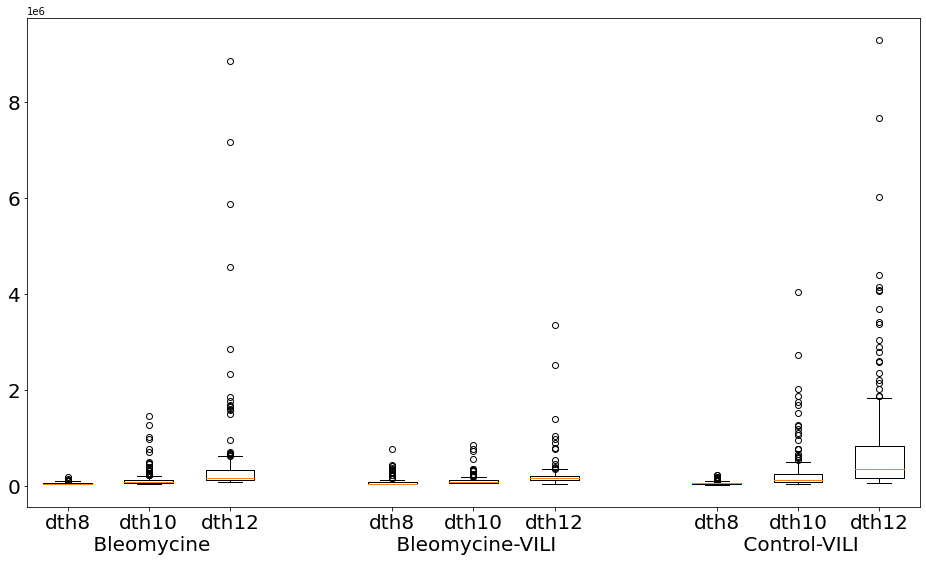

In [17]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(16,9))    
xticks = []
xticklabels = []   
for i, aSeedData in enumerate(blob_volume_per_group_per_seed):

    for j, gr_of_seed in enumerate(aSeedData[1]):
        grp = gr_of_seed[0]
        data = gr_of_seed[1]
        ax.boxplot(data, positions=[i+j*4], widths=0.6)
        
        xticks.append(i+j*4)
        if j == 0 and aSeedData[0] == 'dth10':
            xticklabels.append(aSeedData[0]+'\n Bleomycine')
        elif j == 1 and aSeedData[0] == 'dth10':
            xticklabels.append(aSeedData[0]+'\n Bleomycine-VILI')

        elif j == 2 and aSeedData[0] == 'dth10':
            xticklabels.append(aSeedData[0]+'\n Control-VILI')
        
        else:
            xticklabels.append(aSeedData[0])

        
ax.set_xticklabels(xticklabels)
ax.set_xticks(xticks)
ax.tick_params(axis='both', which='major', labelsize=20)

plt.show()

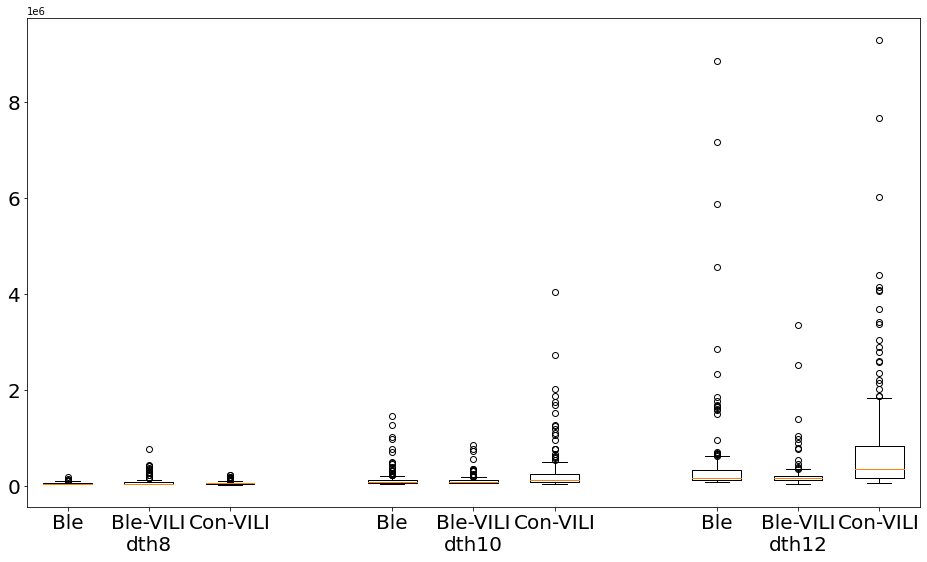

In [18]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(16,9))    
xticks = []
xticklabels = []   
for i, aSeedData in enumerate(blob_volume_per_group_per_seed):

    for j, gr_of_seed in enumerate(aSeedData[1]):
        grp = gr_of_seed[0]
        data = gr_of_seed[1]
        ax.boxplot(data, positions=[i*4+j], widths=0.6)
        
        xticks.append(i*4+j)
        if grp == 'Ble-VILI':
            xticklabels.append(grp+'\n'+aSeedData[0])
        
        else:
            xticklabels.append(grp)



        
ax.set_xticklabels(xticklabels)
ax.set_xticks(xticks)
ax.tick_params(axis='both', which='major', labelsize=20)

plt.show()

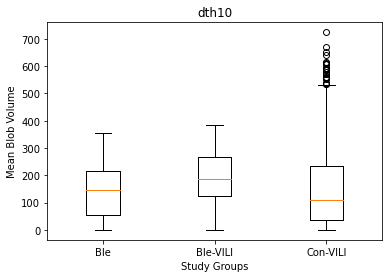

In [22]:
# creating list of lists. where each list is a group
blob_volume_per_group = []
for key in scan_groups.keys():
    json_files = []
    for aFile in scan_groups[key]:
        fpath = os.path.join(root_dir, aFile, 'porespy')
        json_files += glob(fpath+'\*dth10.json')
        
    blob_volume = [] 
    for i, j in enumerate(json_files):
        file = open(j)
        data = json.load(file)
        file.close()
        blob_volume.append(len(data['label']))

    blob_volume_per_group.append([key, blob_volume])

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the boxplot
ax.boxplot([x[1] for x in blob_volume_per_group])

# Add labels and a title to the plot
ax.set_xlabel('Study Groups')
ax.set_ylabel('Mean Blob Volume')
ax.set_title('dth10')
ax.set_xticklabels([x[0] for x in blob_volume_per_group])

# Display the plot
plt.show()

In [55]:
len(json_files)

223

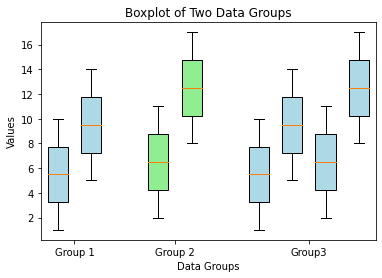

In [44]:
# Create the four lists of data
data1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
data2 = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
data3 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
data4 = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

# Create a list of the data to plot
data_to_plot = [data1, data2, data3, data4]

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the boxplots for the two groups of data
box1 = ax.boxplot(data_to_plot[:2], positions=[1, 2], widths=0.6, patch_artist=True)
box2 = ax.boxplot(data_to_plot[2:], positions=[4, 5], widths=0.6, patch_artist=True)
box3 = ax.boxplot(data_to_plot, positions=[7, 8, 9, 10], widths=0.6, patch_artist=True)

# Set colors for the boxes in each group
for box in box1['boxes']:
    box.set_facecolor('lightblue')
for box in box2['boxes']:
    box.set_facecolor('lightgreen')
for box in box3['boxes']:
    box.set_facecolor('lightblue')

# Add labels and a title to the plot
ax.set_xticks([1.5, 4.5, 8.5])
ax.set_xticklabels(['Group 1', 'Group 2', 'Group3'])
ax.set_xlabel('Data Groups')
ax.set_ylabel('Values')
ax.set_title('Boxplot of Two Data Groups')

# Display the plot
plt.show()

In [ ]:
json_files = []
for aFile in scans:
    fpath = os.path.join(root_dir, aFile, 'porespy')
    json_files += glob(fpath+'\*dth10.json')
print(json_files)

In [7]:
number_of_volume8 = []
for i, j in enumerate(json_files):
    file = open(j)
    data = json.load(file)
    file.close()
    number_of_volume10.append(len(data['label']))
#     plt.plot(i, len(data['label']), )
# plt.show()
    

In [ ]:
fig = plt.figure(figsize=(24,4))
plt.plot(number_of_volume8, label='th8')
plt.plot(number_of_volume10, label='th10')
plt.plot(number_of_volume12, label='th12')
plt.legend()
plt.show()

In [57]:
json_files8 = []
for aFile in scans:
    fpath = os.path.join(root_dir, aFile, 'porespy')
    json_files8 += glob(fpath+'\*dth8.json')


In [60]:
print(json_files8[0])
print(json_files10[0])
print(json_files12[0])

D:\sagar\Data\MD_1264_A10_Z6.6mm\porespy\0-300x1050-1350x600-900_bth55_dth8.json
D:\sagar\Data\MD_1264_A10_Z6.6mm\porespy\0-300x1050-1350x600-900_bth55_dth10.json
D:\sagar\Data\MD_1264_A10_Z6.6mm\porespy\0-300x1050-1350x600-900_bth55_dth12.json


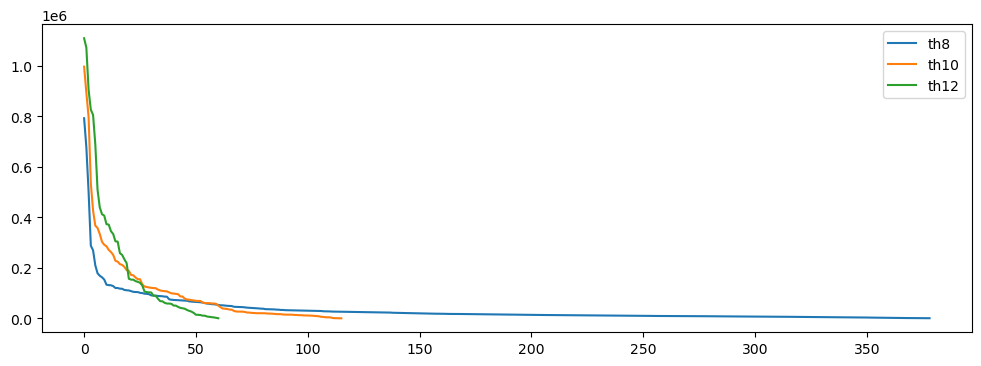

In [75]:
fig = plt.figure(figsize=(12,4))
file = open(json_files8[0])
data = json.load(file)
file.close()
volumes = data['volume']
plt.plot(sorted(volumes, reverse=True), label='th8')
file = open(json_files10[0])
data = json.load(file)
file.close()
volumes = data['volume']
plt.plot(sorted(volumes, reverse=True), label='th10')
file = open(json_files12[0])
data = json.load(file)
file.close()
volumes = data['volume']
plt.plot(sorted(volumes, reverse=True), label='th12')

plt.legend()
plt.show()

In [69]:
print(volumes)

[191, 1924, 3505, 4555, 5771, 6889, 10316, 10379, 12972, 13819, 14070, 21212, 26377, 29426, 32883, 37930, 39659, 41344, 45237, 50117, 50417, 57263, 58306, 58399, 61214, 67348, 67816, 77585, 88847, 89575, 102286, 102619, 103633, 105957, 129824, 140477, 144220, 147076, 152722, 152986, 156478, 218366, 233320, 250873, 257797, 303489, 304409, 333477, 344576, 370739, 372422, 406143, 411762, 438800, 508645, 688276, 805115, 825198, 904397, 1070797, 1108015]


In [28]:
def data_distribution_plots(scan_group_dict, scan_rootPath, scan_regx, feature):
    parameter_per_group = []
    for key in scan_group_dict.keys():
        json_files = []
        for aFile in scan_group_dict[key]:
            fpath = os.path.join(scan_rootPath, aFile, 'porespy')
            json_files += glob(fpath + '\*' +scan_regx + '.json')
        
        parameter = []
        for json_file in json_files:
            file = open(json_file)
            data = json.load(file)
            file.close()
            extract_feature = data[feature]

            #
            # do what we want to plot for exampe, blob volume
            #

            property_to_append = len(extract_feature)
            parameter.append(property_to_append)
        
        parameter_per_group.append([key, parameter])    

    # Create a figure and axis object
    fig, ax = plt.subplots()

    # Create the boxplot
    ax.boxplot([x[1] for x in parameter_per_group])

    # Add labels and a title to the plot
    ax.set_xlabel('study Groups', size=15)
    ax.set_ylabel('data distribution', size=15)
    ax.set_title(('boxplot of data with ' + scan_regx), size=15)
    ax.set_xticklabels([x[0] for x in parameter_per_group])
    ax.tick_params(axis='both', which='major', labelsize=15)

    # Display the plot
    plt.show()


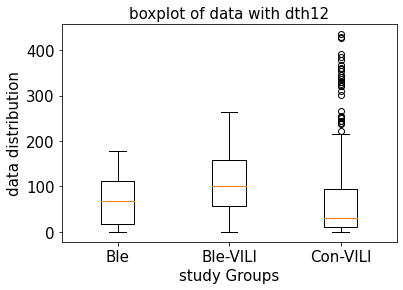

In [29]:
data_distribution_plots(scan_groups, root_dir, 'dth12', 'label')

In [30]:
def data_distribution_plots_per_seed(list_of_seed, scan_group_dict, scan_rootPath, feature):
    parameter_per_group_per_seed = []
    for seed in list_of_seed:
        parameter_per_group = []
        for key in scan_group_dict.keys():
            json_files = []
            for aFile in scan_group_dict[key]:
                fpath = os.path.join(scan_rootPath, aFile, 'porespy')
                json_files += glob(fpath + '\*' + seed + '.json')
            
            parameter = []
            for json_file in json_files:
                file = open(json_file)
                data = json.load(file)
                file.close()
                extract_feature = data[feature]

                #
                # do what we want to plot for exampe, blob volume
                #

                property_to_append = len(extract_feature)
                parameter.append(property_to_append)
            
            parameter_per_group.append([key, parameter])
        
        parameter_per_group_per_seed.append([seed, parameter_per_group])


    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(16,9))    
    xticks = []
    xticklabels = []   
    for i, aSeedData in enumerate(parameter_per_group_per_seed):

        for j, gr_of_seed in enumerate(aSeedData[1]):
            grp = gr_of_seed[0]
            data = gr_of_seed[1]
            ax.boxplot(data, positions=[i+j*4], widths=0.6)
            
            xticks.append(i+j*4)
            if aSeedData[0] == 'dth10':
                xticklabels.append(aSeedData[0]+ '\n' + grp)
            else:
                xticklabels.append(aSeedData[0])



            
    ax.set_xticklabels(xticklabels)
    ax.set_xticks(xticks)
    ax.tick_params(axis='both', which='major', labelsize=20)


    plt.show()

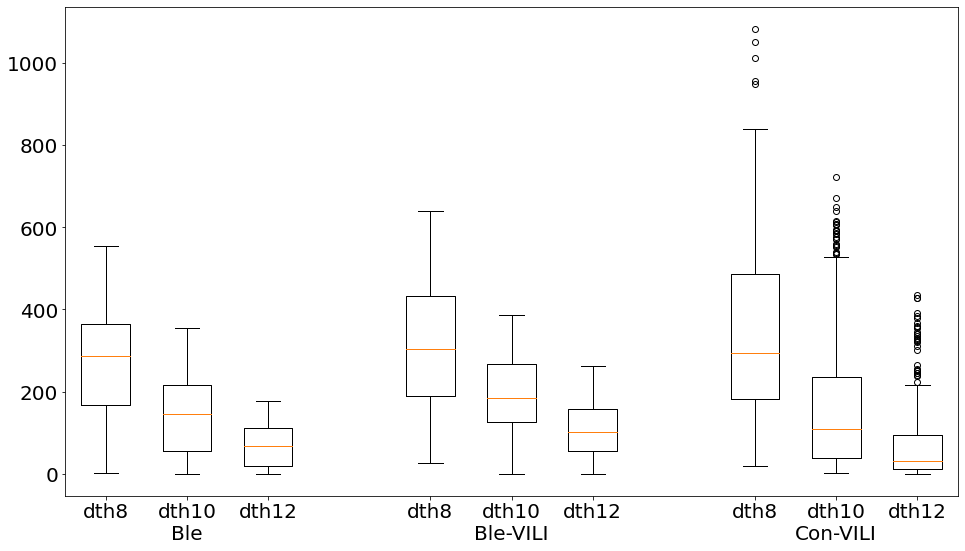

In [32]:
seed_threshold = ['dth8', 'dth10', 'dth12']
data_distribution_plots_per_seed(seed_threshold, scan_groups, root_dir, 'label')

In [33]:
def data_distribution_plots_per_seed2(list_of_seed, scan_group_dict, scan_rootPath, feature):
    parameter_per_group_per_seed = []
    for seed in list_of_seed:
        parameter_per_group = []
        for key in scan_group_dict.keys():
            json_files = []
            for aFile in scan_group_dict[key]:
                fpath = os.path.join(scan_rootPath, aFile, 'porespy')
                json_files += glob(fpath + '\*' + seed + '.json')
            
            parameter = []
            for json_file in json_files:
                file = open(json_file)
                data = json.load(file)
                file.close()
                extract_feature = data[feature]

                #
                # do what we want to plot for exampe, blob volume
                #

                property_to_append = len(extract_feature)
                parameter.append(property_to_append)
            
            parameter_per_group.append([key, parameter])
        
        parameter_per_group_per_seed.append([seed, parameter_per_group])


    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(16,9))    
    xticks = []
    xticklabels = []   
    for i, aSeedData in enumerate(parameter_per_group_per_seed):

        for j, gr_of_seed in enumerate(aSeedData[1]):
            grp = gr_of_seed[0]
            data = gr_of_seed[1]
            ax.boxplot(data, positions=[i*4+j], widths=0.6)
            
            xticks.append(i*4+j)
            if grp == 'Ble-VILI':
                xticklabels.append(grp+'\n'+aSeedData[0])
        
            else:
                xticklabels.append(grp)



            
    ax.set_xticklabels(xticklabels)
    ax.set_xticks(xticks)
    ax.tick_params(axis='both', which='major', labelsize=20)


    plt.show()

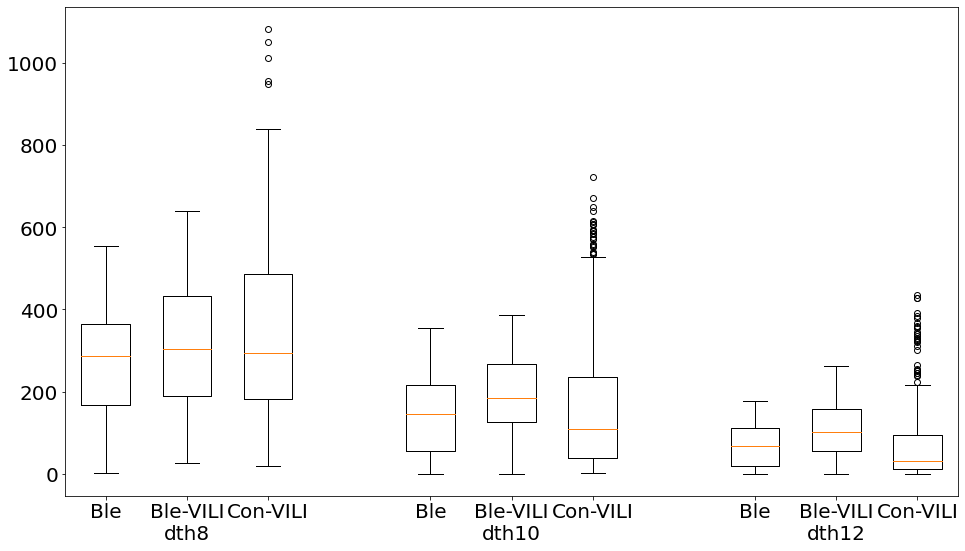

In [34]:
seed_threshold = ['dth8', 'dth10', 'dth12']
data_distribution_plots_per_seed2(seed_threshold, scan_groups, root_dir, 'label')